# ¿Cómo crece una población? 


> El modelo más simple de crecimiento poblacional de organismos es $\frac{dx}{dt}=rx$, donde $x(t)$ es la población en el tiempo $t$ y $r>0$ es la tasa de crecimiento.

> Este modelo predice crecimiento exponencial $x(t)=x_0e^{rt}$ (solución de la ecuación diferencial) donde $x_0=x(0)$ es la población inicial. ¿Es esto válido?
- Recordar que $\lim_{t\to\infty}x(t)=x_0\lim_{t\to\infty}e^{rt}=\infty$.
- Este modelo no tiene en cuenta entonces sobrepoblación ni recursos limitados.

> En realidad la tasa de crecimiento no es una constante, sino que depende de la población $\frac{dx}{dt}=\mu(x)x$. Cuando $x$ es pequeña $\mu(x)\approx r$, como antes, pero cuando $x>1$ y $\mu(x)<0$: la tasa de muerte es mayor a la tasa de nacimiento. Una forma matemática conveniente de modelar lo anterior es con una tasa de crecimiento $\mu(x)$ decreciendo linealmente con $x$.

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

<img style="float: center;" src="./poblacion.jpg" width="450px" height="250px" />

## Ecuación Logística
Primero, veamos como luce $\mu(x)$ con decrecimiento lineal respecto a la población $x$.

Como queremos que $\mu(0)=r$ y $\mu(1)=0$, la línea recta que conecta estos puntos es... (graficar)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mu(x)=r, x=0
# mu(x)=0, x=1
def mu(x,r):
    return r*(1-x)

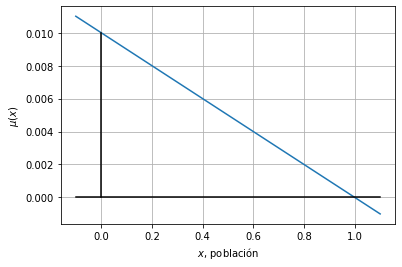

In [5]:
r=0.01
x=np.linspace(-0.1,1.1,100)
plt.plot(x,mu(x,r))
plt.plot([-0.1,1.1],[0,0],'k')
plt.plot([0,0],[0,r],'k')
plt.xlabel('$x$, población')
plt.ylabel('$\mu(x)$')
plt.grid()

___
Entonces, con esta elección de $\mu(x)=r(1-x)$, obtenemos la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = r\; x\; (1- x)$$

**Solución a la ecuación diferencial** 

La ecuación diferencial inicial tiene *solución analítica*, 
$$ x(t) = \frac{1}{1+ \left(\frac{1}{x_{0}}- 1\right) e^{-rt}}.$$

In [26]:
def sol_x(t,r,x0):
    return 1/(1+(1/x0-1)*np.exp(-r*t))

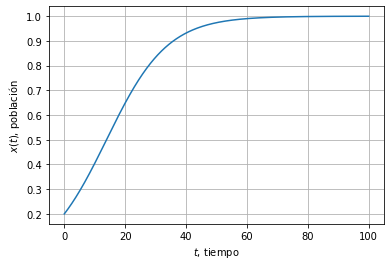

In [9]:
x0=0.2 # propuesto 0<x<1
r=0.1
t=np.linspace(0,100,1000)
x=sol(t,r,x0)
plt.plot(t,x)
plt.xlabel('$t$, tiempo')
plt.ylabel('$x(t)$, población')
plt.grid()

Graficamos varias curvas de la solución analítica para $r = \left[-1, 1\right]$.

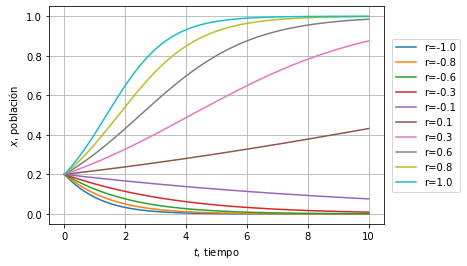

In [16]:
R=np.linspace(-1,1,10)
x0=0.2
t=np.linspace(0,10,500)
for r in R:
    x=sol(t,r,x0)
    plt.plot(t,x,label='r='+str(round(r,1)))
#plt.legend(loc='best')
plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
plt.xlabel('$t$, tiempo')
plt.ylabel('$x$, población')
plt.grid()

Como podemos ver, la solución a está ecuación en el continuo nos puede ganantizar la extinción o bien un crecimiento descomunal, dependiendo del valor asignado a $r$. 

*Numéricamente*, ¿cómo resolveríamos esta ecuación? 

In [ ]:
#!pip install scipy

In [ ]:
#!conda install scipy

In [17]:
from scipy.integrate import odeint,solve_ivp

In [18]:
odeint?

In [19]:
def fun(x,t,r):
    return r*(1-x)*x

In [21]:
r=0.8
x0=0.2
t=np.linspace(0,10,100)
sol=odeint(fun,x0,t,args=(r,))
sol.shape

(100, 1)

In [25]:
x=sol[:,0]
x.shape

(100,)

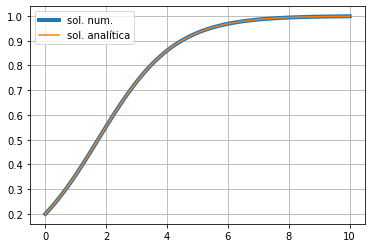

In [28]:
plt.plot(t,x,label='sol. num.',lw=4) # lw=LineWidth
plt.plot(t,sol_x(t,r,x0),label='sol. analítica')
plt.grid()
plt.legend(loc='best')

In [30]:
solve_ivp?

In [40]:
def fun2(t,x):
    return r*(1-x)*x # r -> variable global (definida fuera de la función)
ts=[0,10]
x0=0.2
#sol=solve_ivp(fun2,ts,[x0])
sol=solve_ivp(fun2,ts,[x0],max_step=0.1)
#sol

In [41]:
sol.y.shape

(1, 102)

In [42]:
x2=sol.y[0,:]

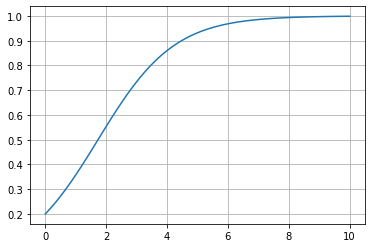

In [43]:
plt.plot(sol.t,x2)
plt.grid()

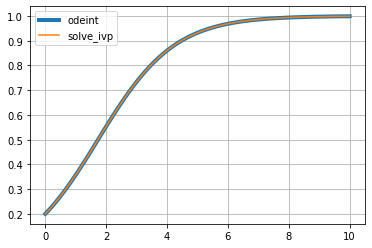

In [45]:
plt.plot(t,x,label='odeint',lw=4)
plt.plot(sol.t,x2,label='solve_ivp')
plt.legend(loc='best')
plt.grid()

### ¿Qué tan buena es la aproximación de la solución numérica?
Hay ecuaciones diferenciales ordinarias no lineales para las cuales es imposible obtener la solución exacta. En estos casos, se evalúa una solución aproximada de forma numérica.

Para el caso anterior fue posible obtener la solución exacta, lo cual nos permite comparar ambas soluciones y evaluar qué tan buena es la aproximación que nos brinda la solución numérica.

Primero veamos esto gráficamente

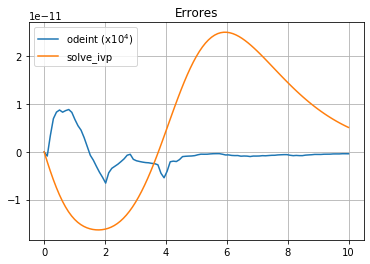

In [55]:
e1=sol_x(t,r,x0)-x
e1=e1*1e-4
e2=sol_x(sol.t,r,x0)-x2
plt.plot(t,e1,label='odeint (x$10^4$)')
plt.plot(sol.t,e2,label='solve_ivp')
plt.legend(loc='best')
plt.title('Errores')
plt.grid()

Gráficamente vemos que la solución numérica está cerca (coincide) con la solución exacta. Sin embargo, con esta gráfica no podemos visualizar qué tan cerca están una solución de la otra. ¿Qué tal si evaluamos el error?

Entonces, **cualitativamente** ya vimos que la solución numérica es *suficientemente buena*. De todas maneras, es siempre bueno cuantificar *qué tan buena* es la aproximación. Varias formas:
- <font color=blue>Norma del error</font>: tenemos el error de aproximación en ciertos puntos (especificados por el vector de tiempo). Este error es entonces un vector y le podemos tomar su norma 2

$$||e||_2=\sqrt{e[0]^2+\dots+e[n-1]^2}$$

In [58]:
np.sum((e1*1e4)**2)

9.112415142305045e-14

In [57]:
np.sum(e2**2)

2.3820123073144278e-20

- <font color=blue>Error cuadrático medio</font>: otra forma de cuantificar es con el error cuadrático medio

$$e_{ms}=\frac{e[0]^2+\dots+e[n-1]^2}{n}$$

In [59]:
np.mean((e1*1e4)**2)

9.112415142305046e-16

In [60]:
np.mean(e2**2)

2.335306183641596e-22

- <font color=blue>Integral del error cuadrático</font>: evalúa la acumulación de error cuadrático. Se puede leevar a cabo con la siguiente aproximación rectangular de la integral

$$e_{is}=\int_{0}^{t_f}e(t)^2\text{d}t\approx \left(e[0]^2+\dots+e[n-1]^2\right)h$$

donde $h$ es el tamaño de paso del vector de tiempo.

In [63]:
t[1]-t[0]

0.10101010101010101

In [64]:
np.sum((e1*1e4)**2)*(t[1]-t[0])

9.204459739702066e-15

In [65]:
np.sum(e2**2)*0.1

2.382012307314428e-21

### Comentarios del modelo logístico
El modelo no se debe tomar literalmente. Más bien se debe interpretar metefóricamente como que la población tiene una tendencia a crecer hasta su tope, o bien, desaparecer.

La ecuación logística fue probada en experimentos de laboratorio para colonias de bacterias en condiciones de clima constante, abastecimiento de comida y ausencia de predadores. Los experimentos mostraron que la ecuación predecía muy bien el comportamiento real.

Por otra parte, la predicción no resultó tan buena para moscas que se alimentan de frutas, escarabajos y otros organismos con ciclos de vida complejos. En esos casos se observaron fluctuaciones (oscilaciones) inmensas de la población.

---
Ecuación logística:
\begin{eqnarray}
\dot{x}&=&\mu x\\
&=&r(1-x)x
\end{eqnarray}

___
## Mapa logístico
> La ecuación logística (curva de crecimiento logístico) es un modelo del crecimiento continuo en el tiempo. Una modificación de la ecuación continua a una ecuación de recurrencia discreta conocida como **mapa logistico** es muy usada.

Referencia: 
- https://es.wikipedia.org/wiki/Aplicación_log%C3%ADstica
- https://en.wikipedia.org/wiki/Logistic_map

> Si reemplazamos la ecuación logísitica por la ecuación a diferencias: 

> $$x_{n+1} = r\; x_{n}(1- x_{n}),$$

> donde $r$ es la razón de crecimiento máximo de la población y $x_{n}$ es la n-ésima iteración. Entonces, lo que tenemos que programar es la siguiente relación recursiva

> $$x_{n+1}^{(r)} = f_r(x_n^{(r)}) = rx_n^{(r)}(1-x_n^{(r)})$$

El siguiente `gif` muestra las primeras 63 iteraciones de la anterior ecuación para diferentes valores de $r$ variando entre 2 y 4.

<img style="float: center;" src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif" width="800px" height="400px" />

Tomado de https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif.

Note que:
- Para $2<r<3$ las soluciones se estabilizan en un valor de equilibrio.
- Para $3<r<1+\sqrt{6}\approx 3.44949$ las soluciones oscilan entre dos valores.
- Para $3.44949<r<3.54409$ las soluciones oscilan entre cuatro valores.
- Para $r>3.54409$ las soluciones exhiben un comportamiento **caótico**.

<font color=red> Caos: comportamiento determinista aperiódico muy sensible a las condiciones iniciales. Es decir, pequeñas variaciones en dichas condiciones iniciales pueden implicar grandes diferencias en el comportamiento futuro</font>

**¿Cómo podemos capturar este comportamiento en una sola gráfica?**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
r=np.linspace(2,4,500)
x=np.ones(500)*0.5 # ones(500) me arroja 500 unos. Valor inicial para 'x' debe ser entre 0 y 1

In [4]:
def maplog(x,r):
    return r*(1-x)*x

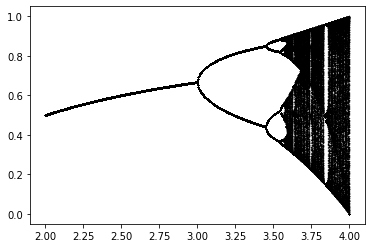

In [9]:
for i in range(1000):
    x=maplog(x,r)
    if i>500:
        plt.scatter(r,x,s=0.1,c='k')